<a href="https://colab.research.google.com/github/SeyitKoyuncu/PyTorch-Self-Studying/blob/main/PyTorch_4(Computer_Vision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer vision libaries in PyTorch

* torchvision (https://pytorch.org/vision/stable/index.html)
* torchvision.datasets - get datasets and data loading functions for computer vision
* torchvision.models - get pretrained computer vision modeles
* torchvision.transform - functions for manipulating your vision data(images) to be suitable for use with an ML model
* torch.utils.data.Dataets - Base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## Getting a dataset

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train = True, # do we want to training data set if it is false meaning of we want to testing dataset
    download = True, # do we want to download,
    transform = torchvision.transforms.ToTensor(),  # how do we want to transform the data
    target_transform = None # do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26421880/26421880 [00:02<00:00, 10743709.62it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174102.74it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3217837.33it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21024612.46it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_ids = train_data.class_to_idx
class_to_ids

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image (color_channels, height, width)
image.shape

torch.Size([1, 28, 28])

### Visulazing our data

Image sahep: torch.Size([1, 28, 28])


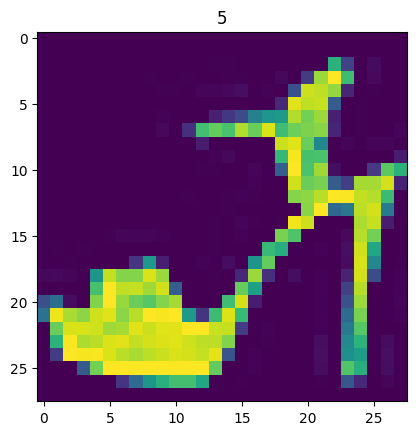

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[9]
print(f"Image sahep: {image.shape}")
plt.title(label)
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

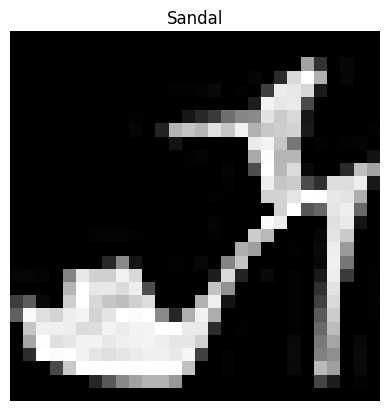

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

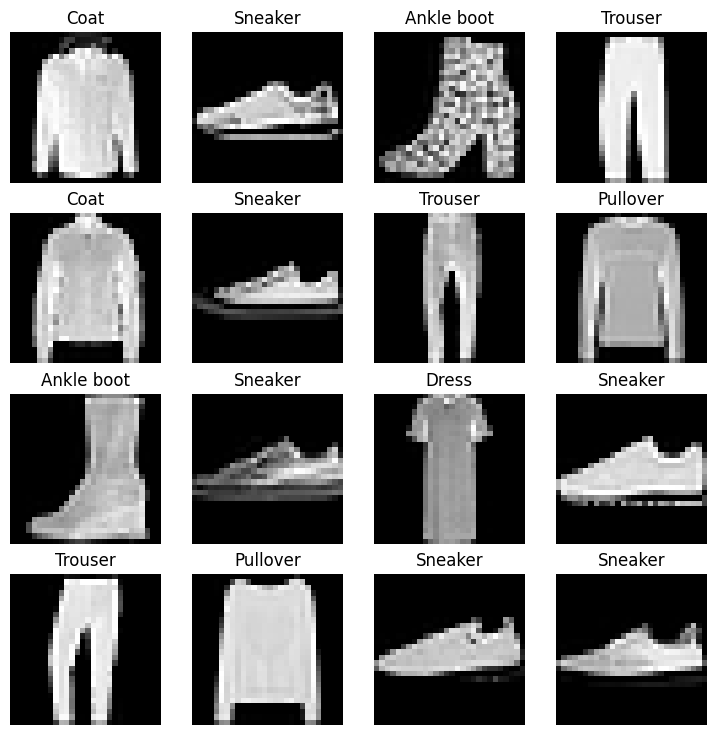

In [ ]:
# Plot more images
torch.manual_seed(9)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i )
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

Data loader turns our dataset into a Pyton iterable. We want to turn our data into batches or mini batches

Advantage of batches:
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It  gives our neural network more chances to update its gradients per epoch. (mini batch gradient descent)

In [ ]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d48508fba30>,
 <torch.utils.data.dataloader.DataLoader at 0x7d4850c7fd00>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d48508fba30>, <torch.utils.data.dataloader.DataLoader object at 0x7d4850c7fd00>)
Length of the train_DataLoader: 1875 batches of 32
Length of the test_DataLoader: 313 batches of 32


In [ ]:
# Check out inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2 Label size: torch.Size([])


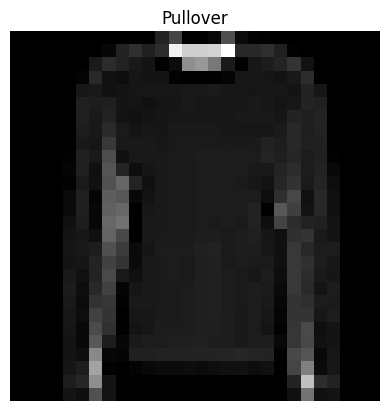

In [ ]:
# Show a sample
torch.manual_seed(9)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label} Label size: {label.shape}")

## Model 0 : Build a baseline model

Best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

So, start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happen
print(f"Shape before flattening: {x.shape} -> (color_channel, height, width)")
print(f"Shape after flattening: {output.shape} -> (color_channels, hight*width)")

Shape before flattening: torch.Size([1, 28, 28]) -> (color_channel, height, width)
Shape after flattening: torch.Size([1, 784]) -> (color_channels, hight*width)


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(9)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28 * 28
    hidden_units = 9,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=9, bias=True)
    (2): Linear(in_features=9, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[ 0.1093, -0.1690, -0.2763, -0.2030,  0.3822, -0.1174, -0.0628, -0.4081,
          0.1772,  0.1691]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 1.1127e-02, -1.4141e-02, -1.4360e-03,  ..., -1.4779e-02,
                        2.9867e-02, -1.7853e-02],
                      [ 7.8963e-03,  9.4045e-03, -1.6541e-02,  ...,  1.5986e-02,
                       -4.6340e-03, -9.3998e-04],
                      [-1.2718e-02, -1.8176e-02,  3.6453e-03,  ...,  1.1043e-02,
                        2.1100e-05,  1.6013e-02],
                      ...,
                      [-8.8764e-04, -2.4250e-02, -3.3833e-02,  ...,  3.5702e-02,
                       -1.5729e-02,  3.3194e-02],
                      [ 1.6063e-02,  1.0800e-02, -3.2082e-02,  ...,  1.5251e-02,
                       -2.6003e-02,  3.2899e-02],
                      [-7.8935e-03, -8.4576e-03, -2.6279e-02,  ...,  1.9797e-02,
                        4.1890e-03, -3.1796e-02]])),
             ('layer_stack.1.bias',
              tensor([ 0.0040, -0.0030, -0.0210, -0.0153, -0.0160,  0.0063, -0.0199,  0.0104,
                

### Setup Loss, optimizer and evaluation metrics

* Loss function - when working with multi-class data nn.CrossEntropyLoss() will be good
* Optimizer torch.optim.SGD()

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Download helper_functions.py


In [ ]:
# Import the accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### Creating a function to time our experiments

Idea is good model performance and fast model so we need to track our model time

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time.  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu: 0.000 seconds


4.124700001284509e-05

### Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening.
4. Time it all

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(9)
train_time_start = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----")

  # Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by lenght of train dataload
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)
  print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end = timer()
total_train_time_model_0 = print_train_time(train_time_start, train_time_end, str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss: 0.5996 | Test Loss: 0.5541, Test acc: 80.7009
Epoch: 1 
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss: 0.4827 | Test Loss: 0.4910, Test acc: 82.6977
Epoch: 2 
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss: 0.4584 | Test Loss: 0.4745, Test acc: 83.3067
Train time on cpu: 28.717 seconds


## Setup device agnostic-code (for using a GPU if ther is one)

In [ ]:
!nvidia-smi

Tue Oct 17 12:31:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

### Take model_0 results

In [ ]:
torch.manual_seed(9)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  """ Returns a dictinory containing the results of model predicting on data_loader """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(DEVICE), y.to(DEVICE)
      model = model.to(DEVICE)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model created with classs
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model_0 result on test dataset
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4744719862937927,
 'model_acc': 83.30670926517571}

## Model 1 : Building better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x : torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(9)
model_1 = FashionMNISTModelV1(input_shape =  28 * 28, # this is the output of the flatten after our 28*28 images goes in
                              hidden_units = 9,
                              output_shape = len(class_names)).to(DEVICE)

print(model_1.parameters)
print(next(model_1.parameters()).device)

<bound method Module.parameters of FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=10, bias=True)
    (5): ReLU()
  )
)>
cuda:0


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### Functionizing training and evaluation/testing loops

In [ ]:
def training_step(model : torch.nn.Module,
                  data_loader : torch.utils.data.DataLoader,
                  loss_fn : torch.nn.Module,
                  optimizer : torch.optim.Optimizer,
                  accuracy_fn,
                  device : torch.device = DEVICE):

  """ Performs a training with model trying to learn on data_loader """
  train_loss, train_acc = 0, 0
  model.train()
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Divide total train loss by lenght of train dataload
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"\nTrain Loss: {train_loss:.4f}, Train acc: {train_acc:.4f}")

def testing_step(model : torch.nn.Module,
                 data_loader : torch.utils.data.DataLoader,
                 loss_fn : torch.nn.Module,
                 accuracy_fn,
                 device : torch.device = DEVICE):
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch
    test_acc /= len(data_loader)
  print(f"\nTest Loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

In [ ]:
### Train the new non-linear model
torch.manual_seed(9)
epochs = 3
start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ---------------------------")
  training_step(model = model_1,
                data_loader = train_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer,
                accuracy_fn = accuracy_fn,
                device = DEVICE)
  testing_step(model = model_1,
            data_loader = train_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = DEVICE)

end_time = timer()
total_train_time_model_1 = print_train_time(start_time, end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ---------------------------

Train Loss: 1.2503, Train acc: 56.4550

Test Loss: 1.1086, Test acc: 60.0033
Epoch: 1 ---------------------------

Train Loss: 1.1166, Train acc: 59.3333

Test Loss: 1.0890, Test acc: 60.2467
Epoch: 2 ---------------------------

Train Loss: 1.0911, Train acc: 60.0850

Test Loss: 1.0542, Test acc: 60.8750
Train time on None: 47.168 seconds


In [ ]:
model_1_results = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.0930655002593994,
 'model_acc': 59.85423322683706}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4744719862937927,
 'model_acc': 83.30670926517571}

## Model 2: Convolutional Neural Network (CNN)

https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 7 * 7 * hidden_units, # there's a trick to calculating this
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Outputsape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Outputsape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Outputsape of classifier: {x.shape}")
    return x

In [ ]:
torch.manual_seed(9)
model_2 = FashionMNISTModelV2(input_shape = 1, # color shape
                              hidden_units = 10,
                              output_shape = len(class_names)).to(DEVICE)

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

### Stepping through *nn.Conv2d*

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(9)

# Create a batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test image : \n{test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test image : 
tensor([[[-1.0674, -0.7172,  1.0897,  ..., -1.1517,  0.7555, -0.6666],
         [ 1.2391,  0.2612,  0.8609,  ..., -1.3504,  0.8874,  0.2150],
         [ 0.0956,  0.1289, -0.6905,  ..., -0.0158, -0.3474, -0.2512],
         ...,
         [-0.1797,  1.0061,  0.2204,  ...,  2.3146,  0.7292, -1.9048],
         [-0.4454, -1.1371,  0.8341,  ...,  0.6769, -0.5537, -0.1935],
         [-1.1631,  0.8652, -1.5442,  ...,  0.1646, -0.1997, -0.2551]],

        [[ 0.3096, -0.5630, -3.6473,  ...,  0.5253,  0.6087, -0.2576],
         [ 1.4089,  1.9747,  1.5554,  ...,  0.5394,  2.3427, -0.8586],
         [-1.4007,  0.2590,  1.1597,  ...,  0.8573, -1.9008, -0.7877],
         ...,
         [ 1.2629, -0.4475, -0.4803,  ...,  0.6208, -1.5965, -0.1789],
         [-1.8936,  0.9409, -0.7205,  ..., -0.0927,  0.6263,  2.6023],
         [ 0.7335, -0.3548, -0.3915,  ..., -0.6718,  1.0718, -0.1300]],

        [

In [ ]:
torch.manual_seed(9)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3, #in_channels same as the color channel
                       out_channels = 10,
                       kernel_size = (3,3),
                       stride = 1,
                       padding = 0)

# Pass the data thorugh the conv layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### *nn.MaxPool2d()*

In [ ]:
print(f"Test image original shape : {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data thorugh the max pool layerr
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape : torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(9)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f"\nRandom tensor: \n {random_tensor}")
print(f"Random tensor shape {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor: 
 tensor([[[[ 0.0447,  1.9112],
          [-0.2310,  0.3459]]]])
Random tensor shape torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[1.9112]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### Setup a loss function and optimizer for model_2

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [ ]:
model_2.state_dict

<bound method Module.state_dict of FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

### Trainin and testing using methods

In [ ]:
torch.manual_seed(9)
torch.cuda.manual_seed(9)

from helper_functions import accuracy_fn

# Measure Time
train_time_start_model_2 = timer()

# Training and test step
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n --------------")
  training_step(model = model_2,
                data_loader = train_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer,
                accuracy_fn = accuracy_fn,
                device = DEVICE)

  testing_step(model = model_2,
               data_loader = test_dataloader,
               loss_fn = loss_fn,
               accuracy_fn = accuracy_fn,
               device = DEVICE)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = DEVICE)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 --------------

Train Loss: 1.1842, Train acc: 57.9250

Test Loss: 0.6367, Test acc: 75.9884
Epoch: 1 
 --------------

Train Loss: 0.5175, Train acc: 81.2783

Test Loss: 0.4830, Test acc: 82.3982
Epoch: 2 
 --------------

Train Loss: 0.4362, Train acc: 84.2767

Test Loss: 0.4307, Test acc: 84.7444
Train time on cuda: 39.052 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.43067044019699097,
 'model_acc': 84.7444089456869}

### Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.474472,83.306709
1,FashionMNISTModelV1,1.093066,59.854233
2,FashionMNISTModelV2,0.430670,84.744409


In [ ]:
# Add training time t o results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.474472,83.306709,28.716615
1,FashionMNISTModelV1,1.093066,59.854233,47.167562
2,FashionMNISTModelV2,0.430670,84.744409,39.051979


Text(0, 0.5, 'model')

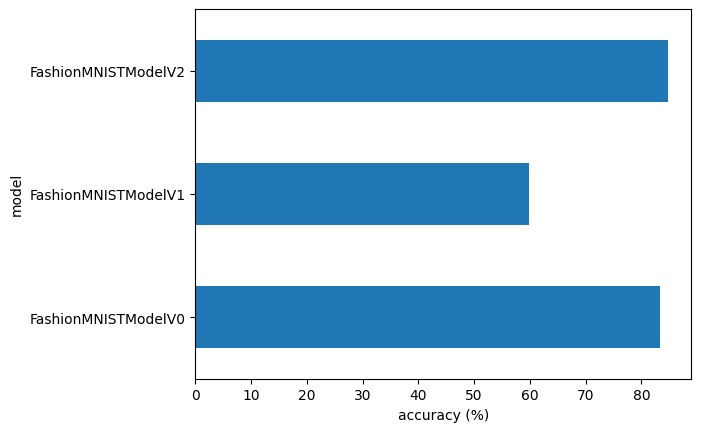

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = DEVICE):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward Pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs) # torch.stack concanate every item in the list into the one tensor

In [ ]:
image, label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
random.seed(9)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

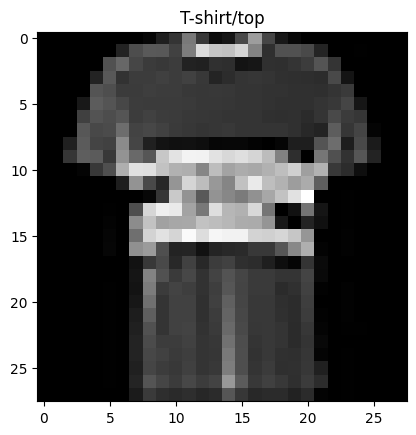

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[9.2070e-01, 1.2907e-04, 9.9984e-03, 4.7900e-03, 9.6046e-05, 2.8792e-06,
         6.3509e-02, 1.0119e-05, 7.6386e-04, 3.1217e-06],
        [7.8510e-08, 8.5631e-12, 4.4693e-09, 6.1446e-10, 5.4532e-11, 9.8902e-01,
         7.4790e-09, 1.5112e-06, 2.4167e-04, 1.0732e-02]])

In [ ]:
# Convert predicition probabilities to the labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([0, 5, 7, 2, 8, 8, 1, 0, 9])

In [ ]:
test_labels

[0, 5, 7, 2, 8, 8, 1, 6, 9]

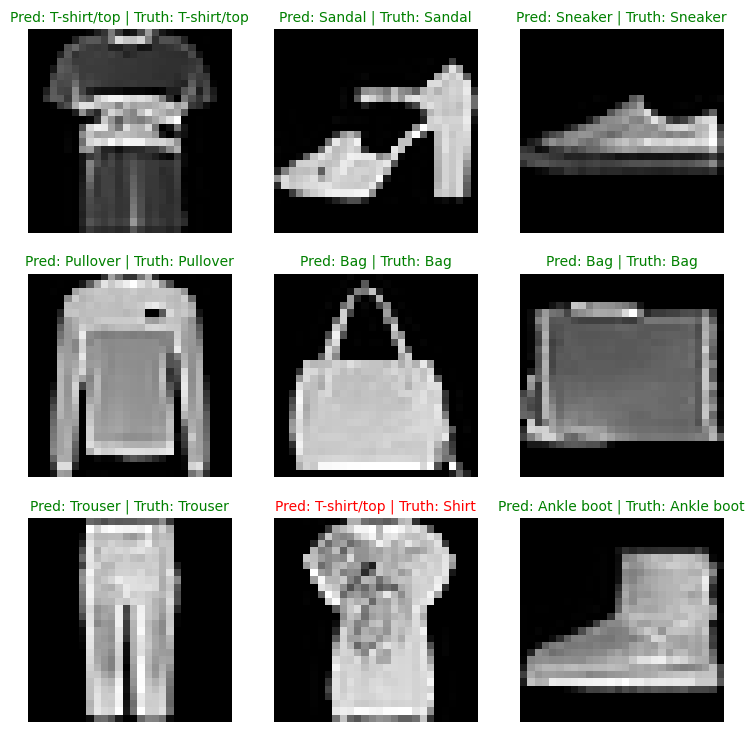

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction label in the text form
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g") # if green text prediction is true
  else:
    plt.title(title_text, fontsize = 10, c = 'r') # if red text prediction is false

  plt.axis(False)

## Making a confusion matrix

1. **torchmetrics.ConfusionMatrix**
2. Plot the confusuion matrix using **mlxtend.plotting.plot_confusuin_matrix()**

In [ ]:
import mlxtend

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(DEVICE), y.to(DEVICE)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0 ).argmax(dim = 1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatane list of predictions into a tensor
print(y_preds[:10])
y_pred_tensor = torch.cat(y_preds) # torch.cat concanate every item in the list into the one tensor
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 5, 4, 5, 2, 3, 4, 6, 2, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 5, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 6, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 6, 8, 4]), tensor([1, 5, 4, 1, 7, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 4,
        1, 4, 5, 2, 4, 7, 9, 3]), tensor([7, 2, 3, 5, 0, 9, 2, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 6, 8, 1, 0, 7, 3, 8,
        7, 9, 5, 4, 4, 7, 3, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        3, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 3, 6, 7, 0, 7, 8, 9, 2, 9, 3, 5, 1, 4, 2, 5, 3, 9, 2, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 5, 8, 6]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 6, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


mlxtend version: 0.22.0


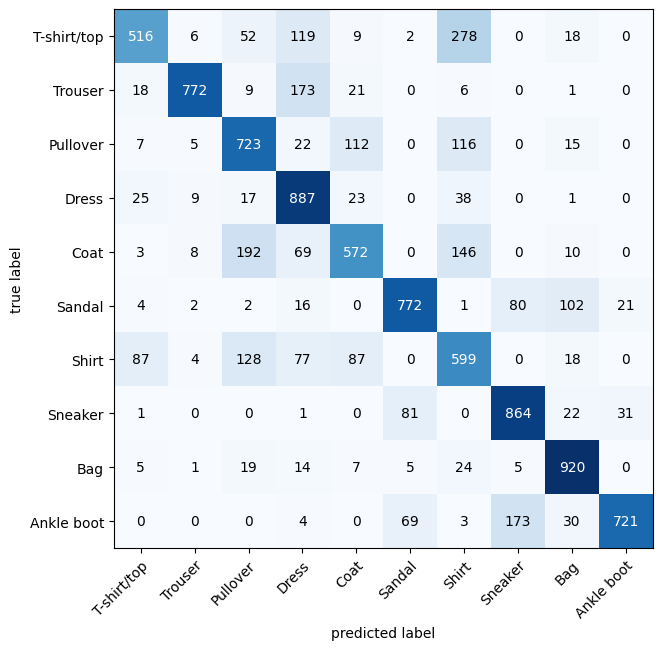

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare perdictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'MULTICLASS')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10,7)
)

##  Save and load best performing model

In [ ]:
from pathlib import Path
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save
MODEL_NAME = "ComputerVisionModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/ComputerVisionModel.pth


In [ ]:
# Create a new instance
torch.manual_seed(9)
loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(DEVICE)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.43067044019699097,
 'model_acc': 84.7444089456869}

In [ ]:
# Evaluate loaded model
torch.manual_seed(9)

loaded_mode_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_mode_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.43067044019699097,
 'model_acc': 84.7444089456869}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_acc"]),
              torch.tensor(loaded_mode_2_results["model_acc"]),
              atol = 1e-02)

tensor(True)